<a href="https://colab.research.google.com/github/pverofeev/FinalWork/blob/main/Final_work_in_Netology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Загружаем HR.csv
! gdown --id 12IcFw5mkF21QT6OgbcByyBqGW5s5gL1b

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12IcFw5mkF21QT6OgbcByyBqGW5s5gL1b
To: /content/HR.csv
100% 567k/567k [00:00<00:00, 53.7MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# 2. Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# мода
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее
# скоррелированные переменные.


# Создаем датафрейм для количественных переменных

dfqv = df [['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]


In [10]:
dfqv.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
# Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная совершенна коррелирует сама с собой.
# Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных.

# Две самые скоррелированные это: average_montly_hours и number_project, а  так же last_evaluation и number_project
# Две наименее скоррелированные это: left и satisfaction_level и left и Work_accident

corr = dfqv.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

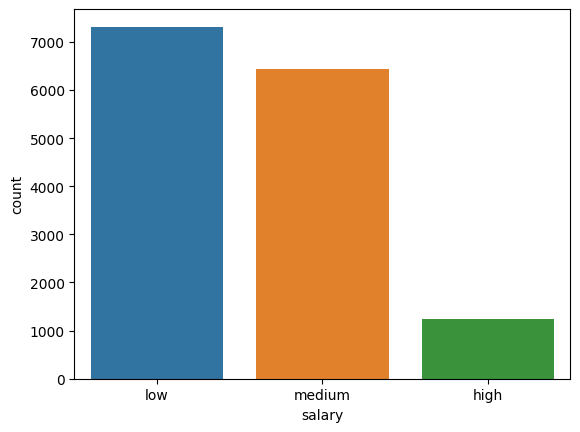

In [ ]:
# 5. Показать распределение сотрудников по зарплатам.
sns.countplot(x ='salary', data = df)

<Axes: ylabel='department,salary'>

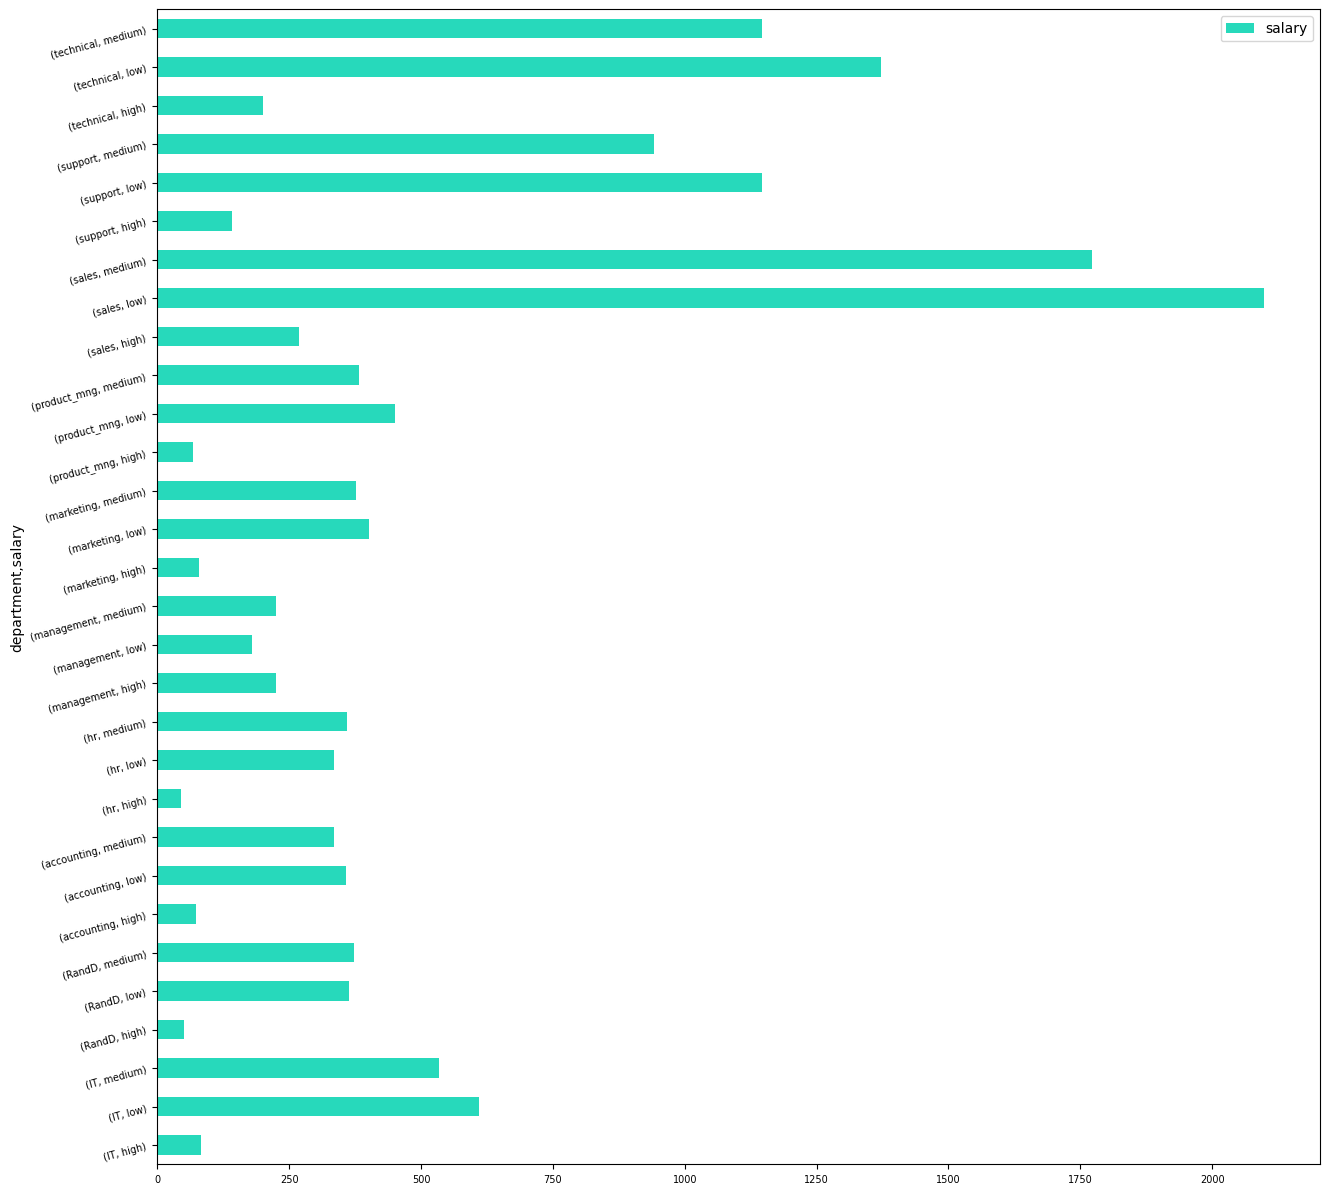

In [ ]:
# 6. Показать распределение сотрудников по зарплатам в каждом
# департаменте по отдельности
df.groupby([df['department'],df['salary']])[['salary']].count().plot(kind="barh",figsize=(15,15), rot=15, fontsize=7, color='#27d9bb')

In [5]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

df_temp = df [df['salary']== 'high']
df_high_salary =  df_temp['average_montly_hours']

df_temp = df [df['salary']== 'low']
df_low_salary =  df_temp['average_montly_hours']


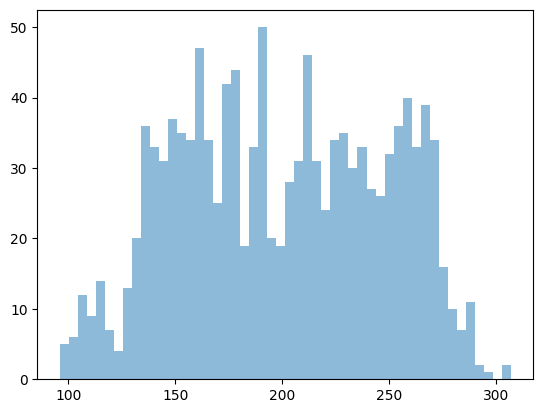

In [6]:
# визуально графики ниже похожи, можно сделать предположение, что нет отличий
plt.hist(df_high_salary, bins=50, alpha=0.5 );

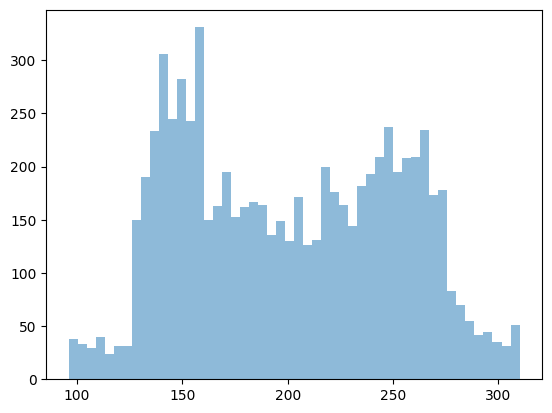

In [7]:
plt.hist(df_low_salary, bins=50, alpha=0.5  );

In [8]:
# Результатом является значение t-статистики и p-значение
t, p = stats.ttest_ind(df_high_salary, df_low_salary)
print(t, p)

-0.7288680398062308 0.4661023478267259


In [ ]:
# Как видим, p-значение больше 0.05, что говорит о том, что гипотеза не верна оклад сотрудника не влияет на то сколько сотрудник проводит на рабочем месте

In [ ]:
# 8.Рассчитать следующие показатели среди уволившихся и не
#уволившихся сотрудников (по отдельности):
#● Доля сотрудников с повышением за последние 5 лет
#● Средняя степень удовлетворенности
#● Среднее количество проектов

# создаем датафреймы с уволившимися и не уволившимися сотрудниками
df1 = df[df['left'] == 1]
df0 = df[df['left'] == 0]

In [ ]:
#● Доля уволившихся сотрудников с повышением за последние 5 лет

len(df1[df1['promotion_last_5years'] == 1])/len(df1)


0.005320638476617194

In [ ]:
#● Доля не уволившихся сотрудников с повышением за последние 5 лет

len(df0[df0['promotion_last_5years'] == 1])/len(df0)

0.026251312565628283

In [ ]:
#● Средняя степень удовлетворенности уволившихся сотрудников
df1['satisfaction_level'].mean()


0.4400980117614114

In [ ]:
#● Средняя степень удовлетворенности не уволившихся сотрудников
df0['satisfaction_level'].mean()

0.666809590479524

In [ ]:
#● Среднее количество проектов уволившихся сотрудников
df1['number_project'].mean()

3.8555026603192384

In [ ]:
#● Среднее количество проектов уволившихся сотрудников
df0['number_project'].mean()

3.786664333216661

In [40]:
#9. Разделить данные на тестовую и обучающую выборки
#Построить модель LDA, предсказывающую уволился ли
#сотрудник на основе имеющихся факторов (кроме department и
#salary)
#Оценить качество модели на тестовой выборки


# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], pd.array(df['left']), test_size=0.25)


In [41]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [42]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [43]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,0,0


In [45]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7642666666666666